In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# Definindo os 3 padrões (imagens 3x3)
pattern1 = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
])

pattern2 = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

pattern3 = np.array([
    [0, 0, 1],
    [0, 1, 0],
    [1, 0, 0]
])

In [47]:
# Empilhando os padrões (cada padrão é flatten para vetor de 9 elementos)
patterns = np.array([
    pattern1.flatten(),
    pattern2.flatten(),
    pattern3.flatten(),
])
# Definindo os rótulos para cada padrão
labels = np.array([0, 1, 2])

In [48]:
# Convertendo para tensores do PyTorch
X = torch.tensor(patterns, dtype=torch.float32)   # shape (3, 9)
Y = torch.tensor(labels, dtype=torch.long)          # shape (3,)

In [49]:
X

tensor([[0., 1., 0., 1., 1., 1., 0., 1., 0.],
        [1., 0., 0., 0., 1., 0., 0., 0., 1.],
        [0., 0., 1., 0., 1., 0., 1., 0., 0.]])

In [50]:
Y

tensor([0, 1, 2])

In [51]:
# Definindo a rede neural simples com uma camada oculta
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(9,4)
        self.fc2 = nn.Linear(4,4)
        self.fc3 = nn.Linear(4,3)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # No activation function at the output layer (depends on task)
        return x

In [52]:
# Instanciando a rede, a função de perda e o otimizador
model = SimpleNN()
print(model)
criterion = nn.CrossEntropyLoss()  # Para classificação (não aplicamos softmax, pois o loss já faz isso)
optimizer = optim.SGD(model.parameters(), lr=0.1)

SimpleNN(
  (fc1): Linear(in_features=9, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=4, bias=True)
  (fc3): Linear(in_features=4, out_features=3, bias=True)
  (relu): ReLU()
)


In [53]:
# Treinamento da rede
epochs = 5000
loss_history = []

for epoch in range(epochs):
    optimizer.zero_grad()          # Zera os gradientes
    outputs = model(X)             # Forward pass (saída com shape (3,3))
    loss = criterion(outputs, Y)   # Calcula a loss comparando com os rótulos corretos
    loss.backward()                # Backpropagation
    optimizer.step()               # Atualiza os pesos
    
    loss_history.append(loss.item())
    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

Epoch 0, Loss: 1.1270
Epoch 500, Loss: 0.0190
Epoch 1000, Loss: 0.0083
Epoch 1500, Loss: 0.0053
Epoch 2000, Loss: 0.0039
Epoch 2500, Loss: 0.0030
Epoch 3000, Loss: 0.0025
Epoch 3500, Loss: 0.0021
Epoch 4000, Loss: 0.0018
Epoch 4500, Loss: 0.0016


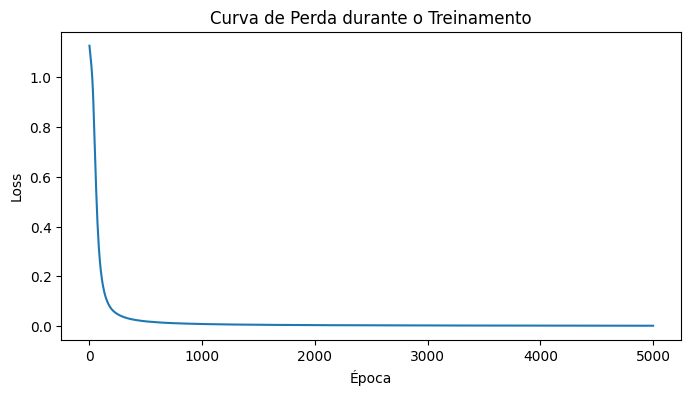

In [54]:
# Visualizando a curva de perda
plt.figure(figsize=(8,4))
plt.plot(loss_history)
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Curva de Perda durante o Treinamento')
plt.show()

In [55]:
# Avaliando a rede
with torch.no_grad():
    outputs = model(X)
    _, predicted = torch.max(outputs, 1)
    print('Rótulos reais:', labels)
    print('Previsões da rede:', predicted.numpy())

Rótulos reais: [0 1 2]
Previsões da rede: [0 1 2]


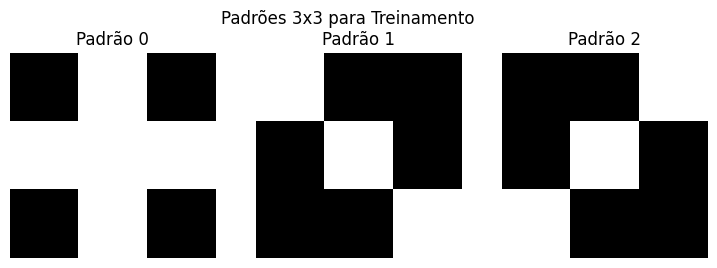

In [56]:
# Visualizando os padrões (imagens 3x3)
fig, axs = plt.subplots(1, 3, figsize=(9,3))
for i, pattern in enumerate(patterns):
    axs[i].imshow(pattern.reshape(3,3), cmap='gray')
    axs[i].set_title(f'Padrão {i}')
    axs[i].axis('off')
plt.suptitle('Padrões 3x3 para Treinamento')
plt.show()

### Testar com novas entradas

In [57]:
# Criando novos padrões semelhantes, mas com pequenas variações
test_pattern1 = np.array([
    [0, 1, 0],
    [1, 0, 1],  # Mudança no centro
    [0, 1, 0]
])

test_pattern2 = np.array([
    [1, 0, 0],
    [0, 1, 1],  # Mudança na parte direita
    [0, 0, 1]
])

test_pattern3 = np.array([
    [0, 0, 1],
    [1, 1, 0],  # Mudança na parte central
    [1, 0, 0]
])

test_pattern4 = np.array([
    [1, 0, 1],
    [0, 1, 0],  # Mudança no centro
    [1, 0, 1]
])

In [58]:
# Convertendo os novos padrões para tensores do PyTorch
X_test = np.array([
    test_pattern1.flatten(),
    test_pattern2.flatten(),
    test_pattern3.flatten(),
    test_pattern4.flatten()
])

In [59]:
X_test_torch = torch.tensor(X_test, dtype=torch.float32)

In [60]:
# Testando a rede com os novos padrões
model.eval()
with torch.no_grad():
    outputs = model(X_test_torch)
    _, predicted_labels = torch.max(outputs, 1)  # Obtém a classe prevista

print("\n==== Teste com Novos Padrões ====")
print("Previsões da rede:", predicted_labels.numpy())



==== Teste com Novos Padrões ====
Previsões da rede: [0 1 2 2]


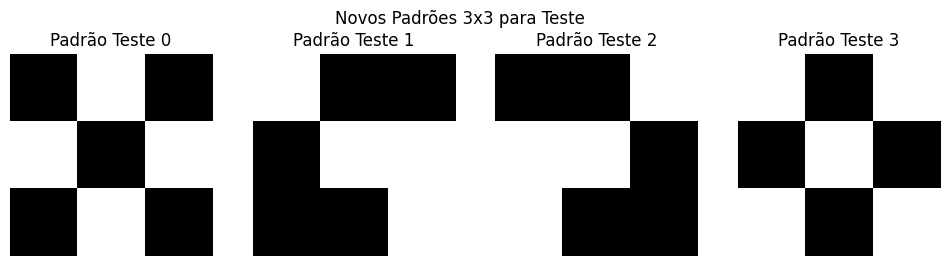

In [61]:
fig, axs = plt.subplots(1, 4, figsize=(12,3))
for i, pattern in enumerate(X_test):
    axs[i].imshow(pattern.reshape(3,3), cmap='gray')
    axs[i].set_title(f'Padrão Teste {i}')
    axs[i].axis('off')

plt.suptitle('Novos Padrões 3x3 para Teste')
plt.show()